# Fruit Image Classification using ResNet50
This notebook is written end executed by **Dr Raheel Siddiqi** on 10-05-2019. The notebook presents an experiment to classify fruit images using *transfer learning*. [Fruits 360](https://www.kaggle.com/moltean/fruits) dataset (containing 52262 training images and 17540 test images belonging to 101 fruit classes) has been exploited for the task. The model designed uses **ResNet50** pre-trained model as the convolutional base.
## Setting up the Model

In [1]:
from tensorflow.python.keras.applications import ResNet50

conv_base=ResNet50(weights='imagenet',include_top=False,input_shape=(100,100,3))

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Raheel\Anaconda3\envs\EnvName\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [2]:
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 50, 50, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [3]:
import os
import numpy as np
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [4]:
from tensorflow.python.keras import models
from tensorflow.python.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(101, activation='softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               16777728  
_________________________________________________________________
dense_1 (Dense)              (None, 101)               51813     
Total params: 40,417,253
Trainable params: 40,364,133
Non-trainable params: 53,120
_________________________________________________________________


## Setting up Training and Validation Data

In [6]:
train_dir='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Training'

In [7]:
validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Test'

In [8]:
from tensorflow.python.keras import optimizers

model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])

In [9]:
batch_size=32
number_of_training_samples=52262
number_of_test_samples=17540

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 52262 images belonging to 101 classes.
Found 17540 images belonging to 101 classes.


## Model Training

In [11]:
import math

history = model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=50,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_test_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1634/1634 [==============================] - 1013s 620ms/step - loss: 0.2572 - categorical_accuracy: 0.9358 - val_loss: 0.0600 - val_categorical_accuracy: 0.9831
Epoch 2/50
1634/1634 [==============================] - 574s 352ms/step - loss: 0.0845 - categorical_accuracy: 0.9826 - val_loss: 0.0871 - val_categorical_accuracy: 0.9811
Epoch 3/50
1634/1634 [==============================] - 576s 353ms/step - loss: 0.0719 - categorical_accuracy: 0.9848 - val_loss: 0.2361 - val_categorical_accuracy: 0.9686
Epoch 4/50
1634/1634 [==============================] - 576s 353ms/step - loss: 0.0542 - categorical_accuracy: 0.9899 - val_loss: 5.5386 - val_categorical_accuracy: 0.4957
Epoch 5/50
1634/1634 [==============================] - 573s 351ms/step - loss: 0.0469 - categorical_accuracy: 0.9887 - val_loss: 0.0282 - val_categorical_accuracy: 0.9912
Epoch 6/50
1634/1634 [==============================] - 575s 352ms/step - loss: 0.0355 - ca

1634/1634 [==============================] - 582s 356ms/step - loss: 0.0088 - categorical_accuracy: 0.9978 - val_loss: 0.1211 - val_categorical_accuracy: 0.9692
Epoch 30/50
1634/1634 [==============================] - 578s 354ms/step - loss: 0.0085 - categorical_accuracy: 0.9976 - val_loss: 0.0867 - val_categorical_accuracy: 0.9853
Epoch 31/50
1634/1634 [==============================] - 580s 355ms/step - loss: 0.0100 - categorical_accuracy: 0.9974 - val_loss: 0.0175 - val_categorical_accuracy: 0.9951
Epoch 32/50
1634/1634 [==============================] - 582s 356ms/step - loss: 0.0093 - categorical_accuracy: 0.9977 - val_loss: 0.0162 - val_categorical_accuracy: 0.9954
Epoch 33/50
1634/1634 [==============================] - 583s 357ms/step - loss: 0.0139 - categorical_accuracy: 0.9973 - val_loss: 0.0617 - val_categorical_accuracy: 0.9863
Epoch 34/50
1634/1634 [==============================] - 582s 356ms/step - loss: 0.0086 - categorical_accuracy: 0.9979 - val_loss: 0.0284 - val_cat

In [12]:
import matplotlib.pyplot as plt

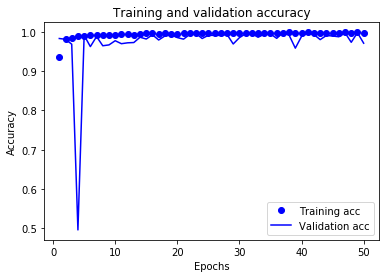

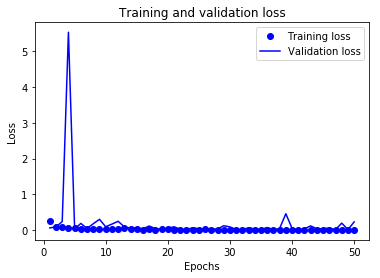

In [13]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('fruit_image_classification_101_classes_transfer learning_ResNet50_data augmentation_a',format='png')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('fruit_image_classification_101_classes_transfer learning_ResNet50_data augmentation_b',format='png')
plt.show()

## Model Evaluation

In [14]:
steps_test=int(17540/32)
print(steps_test)

548


In [15]:
result = model.evaluate_generator(validation_generator, steps=steps_test)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

Test-set classification accuracy: 97.12%


## Saving and Reloading the Model

In [17]:
from tensorflow.python.keras.models import load_model

model.save('ResNet50_fruit_image_classification_model_101_classes.h5')  # creates a HDF5 file 
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model_copy = load_model('ResNet50_fruit_image_classification_model_101_classes.h5')

In [19]:
result = model_copy.evaluate_generator(validation_generator, steps=steps_test)
print("Test-set classification accuracy: {0:.2%}".format(result[1]))

Test-set classification accuracy: 97.12%
